In [20]:
#!pip install xgboost graphviz

import graphviz

# Import plotting modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Decision trees as base learners

### It's now time to build an XGBoost model to predict house prices - not in Boston, Massachusetts, as you saw in the video, but in Ames, Iowa! This dataset of housing prices has been pre-loaded into a DataFrame called df. If you explore it in the Shell, you'll see that there are a variety of features about the house and its location in the city.

### In this exercise, your goal is to use trees as base learners. By default, XGBoost uses trees as base learners, so you don't have to specify that you want to use trees here with booster="gbtree".

### xgboost has been imported as xgb and the arrays for the features and the target are available in X and y, respectively.

-    Split df into training and testing sets, holding out 20% for testing. Use a random_state of 123.
-    Instantiate the XGBRegressor as xg_reg, using a seed of 123. Specify an objective of "reg:linear" and use 10 trees. Note: You don't have to specify booster="gbtree" as this is the default.
-    Fit xg_reg to the training data and predict the labels of the test set. Save the predictions in a variable called preds.
-    Compute the rmse using np.sqrt() and the mean_squared_error() function from sklearn.metrics, which has been pre-imported.

In [6]:
df = pd.read_csv('../../data/ames_housing_trimmed_processed.csv')
X, y = df.iloc[:,:-1],df.iloc[:,-1]
X.shape,y.shape

((1460, 56), (1460,))

In [7]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective="reg:linear", n_estimators=10, seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(preds, y_test))
print("RMSE: %f" % (rmse))

RMSE: 31292.975890


/opt/conda/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:54:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


## Linear base learners

### Now that you've used trees as base models in XGBoost, let's use the other kind of base model that can be used with XGBoost - a linear learner. This model, although not as commonly used in XGBoost, allows you to create a regularized linear regression using XGBoost's powerful learning API. However, because it's uncommon, you have to use XGBoost's own non-scikit-learn compatible functions to build the model, such as xgb.train().

### In order to do this you must create the parameter dictionary that describes the kind of booster you want to use (similarly to how you created the dictionary in Chapter 1 when you used xgb.cv()). The key-value pair that defines the booster type (base model) you need is "booster":"gblinear".

### Once you've created the model, you can use the .train() and .predict() methods of the model just like you've done in the past.

### Here, the data has already been split into training and testing sets, so you can dive right into creating the DMatrix objects required by the XGBoost learning API.

-    Create two DMatrix objects - DM_train for the training set (X_train and y_train), and DM_test (X_test and y_test) for the test set.
-    Create a parameter dictionary that defines the "booster" type you will use ("gblinear") as well as the "objective" you will minimize ("reg:linear").
-    Train the model using xgb.train(). You have to specify arguments for the following parameters: params, dtrain, and num_boost_round. Use 5 boosting rounds.
-    Predict the labels on the test set using xg_reg.predict(), passing it DM_test. Assign to preds.
-    Hit 'Submit Answer' to view the RMSE!

In [8]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train,label=y_train)
DM_test =  xgb.DMatrix(data=X_test,label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:linear"}

# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 44702.057593


/opt/conda/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:54:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


## Evaluating model quality

### It's now time to begin evaluating model quality.

### Here, you will compare the RMSE and MAE of a cross-validated XGBoost model on the Ames housing data. As in previous exercises, all necessary modules have been pre-loaded and the data is available in the DataFrame df.

-    Perform 4-fold cross-validation with 5 boosting rounds and "rmse" as the metric.
-    Extract and print the final boosting round RMSE.

In [9]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics='rmse', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0     61729.274347      679.377718    63760.373921    2933.496745
1     49654.722560      757.696043    53641.473273    3504.687699
2     41325.179705      702.570217    46796.539109    3500.230673
3     35351.338939      772.520024    41986.507917    4018.899377
4     31020.037762      574.099506    39337.103754    4583.588151
4    39337.103754
Name: test-rmse-mean, dtype: float64


/opt/conda/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:55:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


-    Now, adapt your code to compute the "mae" instead of the "rmse".

In [10]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics='mae', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-mae-mean"]).tail(1))

   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0    43978.370783     265.516103   44551.030843    875.854839
1    34677.517623     229.638967   35869.958037   1015.100363
2    28338.053913     290.958119   30144.292723    902.020896
3    24076.657948     451.048602   26492.798309    835.506913
4    21115.815254     428.025143   24289.425664    994.137976
4    24289.425664
Name: test-mae-mean, dtype: float64


/opt/conda/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:56:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


## Using regularization in XGBoost

### Having seen an example of l1 regularization in the video, you'll now vary the l2 regularization penalty - also known as "lambda" - and see its effect on overall model performance on the Ames housing dataset.

-    Create your DMatrix from X and y as before.
-    Create an initial parameter dictionary specifying an "objective" of "reg:linear" and "max_depth" of 3.
-    Use xgb.cv() inside of a for loop and systematically vary the "lambda" value by passing in the current l2 value (reg).
-    Append the "test-rmse-mean" from the last boosting round for each cross-validated xgboost model.
-    Hit 'Submit Answer' to view the results. What do you notice?

In [11]:
df = pd.read_csv("../../data/ames_housing_trimmed_processed.csv")
X, y = df.iloc[:,:-1],df.iloc[:,-1]
X.shape,y.shape

((1460, 56), (1460,))

In [12]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:linear","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

Best rmse as a function of l2:
    l2          rmse
0    1  40871.470438
1   10  42944.793376
2  100  52222.078307


/opt/conda/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [06:35:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


## Visualizing individual XGBoost trees

### Now that you've used XGBoost to both build and evaluate regression as well as classification models, you should get a handle on how to visually explore your models. Here, you will visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset.

### XGBoost has a plot_tree() function that makes this type of visualization easy. Once you train a model using the XGBoost learning API, you can pass it to the plot_tree() function along with the number of trees you want to plot using the num_trees argument.

-    Create a parameter dictionary with an "objective" of "reg:linear" and a "max_depth" of 2.
-    Train the model using 10 boosting rounds and the parameter dictionary you created. Save the result in xg_reg.
-    Plot the first tree using xgb.plot_tree(). It takes in two arguments - the model (in this case, xg_reg), and num_trees, which is 0-indexed. So to plot the first tree, specify num_trees=0.
-    Plot the fifth tree.
-    Plot the last (tenth) tree sideways. To do this, specify the additional keyword argument rankdir="LR".

/opt/conda/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [06:44:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


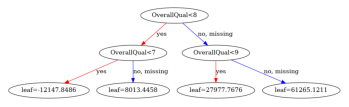

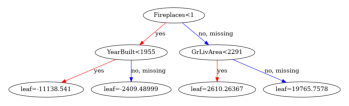

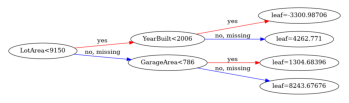

In [21]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(booster=xg_reg, num_trees=0)
plt.show()

# Plot the fifth tree
xgb.plot_tree(booster=xg_reg, num_trees=4)
plt.show()

# Plot the last tree sideways
xgb.plot_tree(booster=xg_reg, num_trees=9, rankdir="LR")
plt.show()

## Visualizing feature importances: What features are most important in my dataset

### Another way to visualize your XGBoost models is to examine the importance of each feature column in the original dataset within the model.

### One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. XGBoost has a plot_importance() function that allows you to do exactly this, and you'll get a chance to use it in this exercise!

-    Create your DMatrix from X and y as before.
-    Create a parameter dictionary with appropriate "objective" ("reg:linear") and a "max_depth" of 4.
-    Train the model with 10 boosting rounds, exactly as you did in the previous exercise.
-    Use xgb.plot_importance() and pass in the trained model to generate the graph of feature importances.

/opt/conda/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [06:44:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


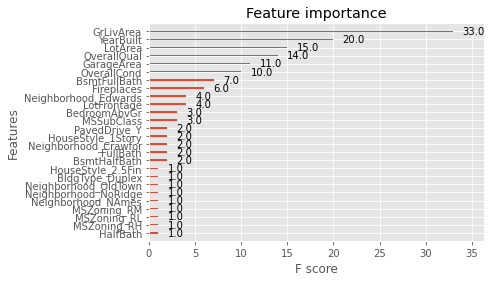

In [22]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective": "reg:linear", "max_depth": 4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(booster=xg_reg)
plt.show()